In [1]:
import pandas as pd
import numpy as np
from collections import Counter as c
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import pickle


In [2]:
data = pd.read_csv("/Users/Aayush/Desktop/CKD_prediction_project/dataset/kidney_disease.csv")
print(data.head())

   id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]


In [3]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [4]:
data.columns = ['id', 'age', 'blood_pressure', 'specific_gravity', 'albumin'
                , 'sugar', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps'
                , 'bacteria', 'blood_glucose_random', 'blood_urea', 
                'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 
                'packed_cell_volume', 'white_blood_cell_count', 
                'red_blood_cell_count', 'hypertension', 'diabetes_mellitus',
                'coronary_artery_disease', 'appetite', 'pedal_edema', 
                'anemia', 'class']
data.columns

Index(['id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [6]:
data.isnull().any()

id                         False
age                         True
blood_pressure              True
specific_gravity            True
albumin                     True
sugar                       True
red_blood_cells             True
pus_cell                    True
pus_cell_clumps             True
bacteria                    True
blood_glucose_random        True
blood_urea                  True
serum_creatinine            True
sodium                      True
potassium                   True
haemoglobin                 True
packed_cell_volume          True
white_blood_cell_count      True
red_blood_cell_count        True
hypertension                True
diabetes_mellitus           True
coronary_artery_disease     True
appetite                    True
pedal_edema                 True
anemia                      True
class                      False
dtype: bool

In [7]:
data['blood_glucose_random'] = data['blood_glucose_random'].fillna(data['blood_glucose_random'].mean())
data['blood_pressure'] = data['blood_pressure'].fillna(data['blood_pressure'].mean())


In [8]:
# the above way didn't work here because :

# Some columns, like 'blood_urea', contained non-numeric values (e.g., strings like '--', 'N/A', or even empty strings). That causes: .mean() to fail → TypeError


cols_to_fix = [
    'blood_urea', 'haemoglobin', 'packed_cell_volume', 'potassium', 'red_blood_cell_count', 'serum_creatinine', 'sodium', 'white_blood_cell_count', 'age', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria'
]
for col in cols_to_fix:
    data[col] = pd.to_numeric(data[col], errors='coerce')
    data[col] = data[col].fillna(data[col].mean())

# Why this works:
# pd.to_numeric(..., errors='coerce') turns bad values into NaN.
# .fillna(...mean()) now works safely.

In [9]:
data.isnull().sum()


id                           0
age                          0
blood_pressure               0
specific_gravity             0
albumin                      0
sugar                        0
red_blood_cells            400
pus_cell                   400
pus_cell_clumps            400
bacteria                   400
blood_glucose_random         0
blood_urea                   0
serum_creatinine             0
sodium                       0
potassium                    0
haemoglobin                  0
packed_cell_volume           0
white_blood_cell_count       0
red_blood_cell_count         0
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

In [10]:
catcols = set(data.dtypes[data.dtypes == 'O'].index.values)
print(catcols)

{'pedal_edema', 'coronary_artery_disease', 'class', 'anemia', 'appetite', 'hypertension', 'diabetes_mellitus'}


In [11]:
for i in catcols:
    print("Columns :", i)
    print(c(data[i]))
    print('*'*120+'\n')

Columns : pedal_edema
Counter({'no': 323, 'yes': 76, nan: 1})
************************************************************************************************************************

Columns : coronary_artery_disease
Counter({'no': 362, 'yes': 34, '\tno': 2, nan: 2})
************************************************************************************************************************

Columns : class
Counter({'ckd': 248, 'notckd': 150, 'ckd\t': 2})
************************************************************************************************************************

Columns : anemia
Counter({'no': 339, 'yes': 60, nan: 1})
************************************************************************************************************************

Columns : appetite
Counter({'good': 317, 'poor': 82, nan: 1})
************************************************************************************************************************

Columns : hypertension
Counter({'no': 251, 'yes': 147, nan:

In [12]:
print(catcols)

{'pedal_edema', 'coronary_artery_disease', 'class', 'anemia', 'appetite', 'hypertension', 'diabetes_mellitus'}


Label Encoding of Categorical Column

In [13]:
catcols = ['anemia', 'pedal_edema', 'appetite', 'bacteria', 'class', 'coronary_artery_disease', 'diabetes_mellitus', 'hypertension', 'pus_cell', 'pus_cell_clumps', 'red_blood_cells']

In [14]:
from sklearn.preprocessing import LabelEncoder
for i in catcols:
    print("Label Encoding of:", i)
    LEi = LabelEncoder()
    print(c(data[i]))
    data[i] = LEi.fit_transform(data[i])
    print(c(data[i]))
    print('*'*100)

Label Encoding of: anemia
Counter({'no': 339, 'yes': 60, nan: 1})
Counter({0: 339, 1: 60, 2: 1})
****************************************************************************************************
Label Encoding of: pedal_edema
Counter({'no': 323, 'yes': 76, nan: 1})
Counter({0: 323, 1: 76, 2: 1})
****************************************************************************************************
Label Encoding of: appetite
Counter({'good': 317, 'poor': 82, nan: 1})
Counter({0: 317, 1: 82, 2: 1})
****************************************************************************************************
Label Encoding of: bacteria
Counter({nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1,

In [15]:
contcols = set(data.dtypes[data.dtypes != 'O'].index.values)
print(contcols)

{'sugar', 'haemoglobin', 'pus_cell_clumps', 'red_blood_cell_count', 'white_blood_cell_count', 'blood_urea', 'albumin', 'red_blood_cells', 'anemia', 'bacteria', 'potassium', 'age', 'hypertension', 'coronary_artery_disease', 'packed_cell_volume', 'pedal_edema', 'specific_gravity', 'diabetes_mellitus', 'blood_pressure', 'id', 'sodium', 'class', 'pus_cell', 'appetite', 'blood_glucose_random', 'serum_creatinine'}


In [16]:
for i in contcols:
    print("Continuous Columns :", i)
    print(c(data[i]))
    print('*'*120+'\n')

Continuous Columns : sugar
Counter({0.0: 290, 0.45014245014245013: 49, 2.0: 18, 3.0: 14, 4.0: 13, 1.0: 13, 5.0: 3})
************************************************************************************************************************

Continuous Columns : haemoglobin
Counter({12.526436781609195: 52, 15.0: 16, 10.9: 8, 9.8: 7, 11.1: 7, 13.0: 7, 13.6: 7, 11.3: 6, 10.3: 6, 12.0: 6, 13.9: 6, 15.4: 5, 11.2: 5, 10.8: 5, 9.7: 5, 12.6: 5, 7.9: 5, 10.0: 5, 14.0: 5, 14.3: 5, 14.8: 5, 12.2: 4, 12.4: 4, 12.5: 4, 15.2: 4, 9.1: 4, 11.9: 4, 13.5: 4, 16.1: 4, 14.1: 4, 13.2: 4, 13.8: 4, 13.7: 4, 13.4: 4, 17.0: 4, 15.5: 4, 15.8: 4, 9.6: 3, 11.6: 3, 9.5: 3, 9.4: 3, 12.7: 3, 9.9: 3, 10.1: 3, 8.6: 3, 11.0: 3, 15.6: 3, 8.1: 3, 8.3: 3, 10.4: 3, 11.8: 3, 11.4: 3, 11.5: 3, 15.9: 3, 14.5: 3, 16.2: 3, 14.4: 3, 14.2: 3, 16.3: 3, 16.5: 3, 15.7: 3, 16.4: 3, 14.9: 3, 15.3: 3, 17.8: 3, 12.1: 2, 9.3: 2, 10.2: 2, 10.5: 2, 6.0: 2, 11.7: 2, 8.0: 2, 12.3: 2, 8.7: 2, 13.1: 2, 8.8: 2, 13.3: 2, 14.6: 2, 16.9: 2, 16.0: 2, 

In [17]:
# contcols.remove('specific_gravity')
# contcols.remove('sugar')
# contcols.remove('albumin')
print(contcols)


{'sugar', 'haemoglobin', 'pus_cell_clumps', 'red_blood_cell_count', 'white_blood_cell_count', 'blood_urea', 'albumin', 'red_blood_cells', 'anemia', 'bacteria', 'potassium', 'age', 'hypertension', 'coronary_artery_disease', 'packed_cell_volume', 'pedal_edema', 'specific_gravity', 'diabetes_mellitus', 'blood_pressure', 'id', 'sodium', 'class', 'pus_cell', 'appetite', 'blood_glucose_random', 'serum_creatinine'}


In [18]:
# contcols.add('red_blood_cell_count')
# contcols.add('packed_cell_volume')
# contcols.add('white_blood_cell_count')
print(contcols)

{'sugar', 'haemoglobin', 'pus_cell_clumps', 'red_blood_cell_count', 'white_blood_cell_count', 'blood_urea', 'albumin', 'red_blood_cells', 'anemia', 'bacteria', 'potassium', 'age', 'hypertension', 'coronary_artery_disease', 'packed_cell_volume', 'pedal_edema', 'specific_gravity', 'diabetes_mellitus', 'blood_pressure', 'id', 'sodium', 'class', 'pus_cell', 'appetite', 'blood_glucose_random', 'serum_creatinine'}


In [19]:
# append bc catcols is a list not a set
# catcols.append('specific_gravity')
# catcols.append('albumin')
# catcols.append('sugar')
print(catcols)

['anemia', 'pedal_edema', 'appetite', 'bacteria', 'class', 'coronary_artery_disease', 'diabetes_mellitus', 'hypertension', 'pus_cell', 'pus_cell_clumps', 'red_blood_cells']


In [20]:
data['coronary_artery_disease'] = data.coronary_artery_disease.replace('\tno', 'no')
c(data['coronary_artery_disease'])

Counter({1: 362, 2: 34, 0: 2, 3: 2})

In [21]:
# .replace(to_replace={...}) tells pandas to look for specific values and change them
# line below is basically removing all the leading whitespaces (specifically tabs here '\t')
data['diabetes_mellitus'] = data.diabetes_mellitus.replace(to_replace={'\tno':'no', '\tyes':'yes'})
c(data['diabetes_mellitus'])

Counter({3: 258, 4: 134, 0: 3, 1: 2, 5: 2, 2: 1})

Exploratory data analysis

<Axes: xlabel='age', ylabel='Count'>

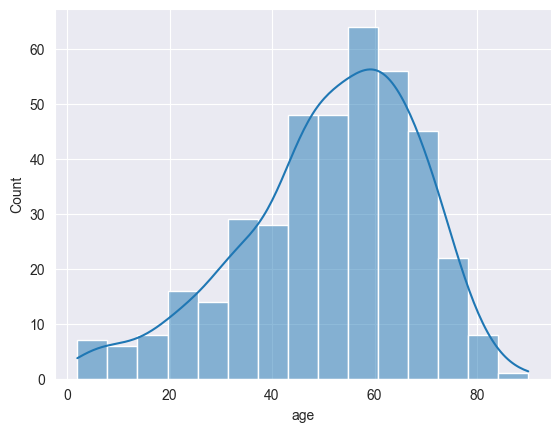

In [22]:
sns.histplot(data.age, kde=True)

Age vs Blood Pressure

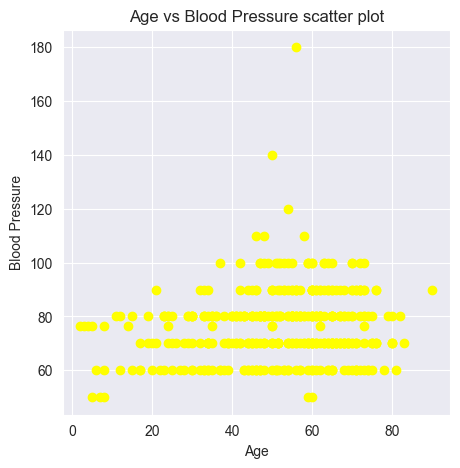

In [23]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5, 5)) # plot size
plt.scatter(data['age'], data['blood_pressure'], color='yellow')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.title('Age vs Blood Pressure scatter plot')
plt.show()

Age vs all Continuous Columns

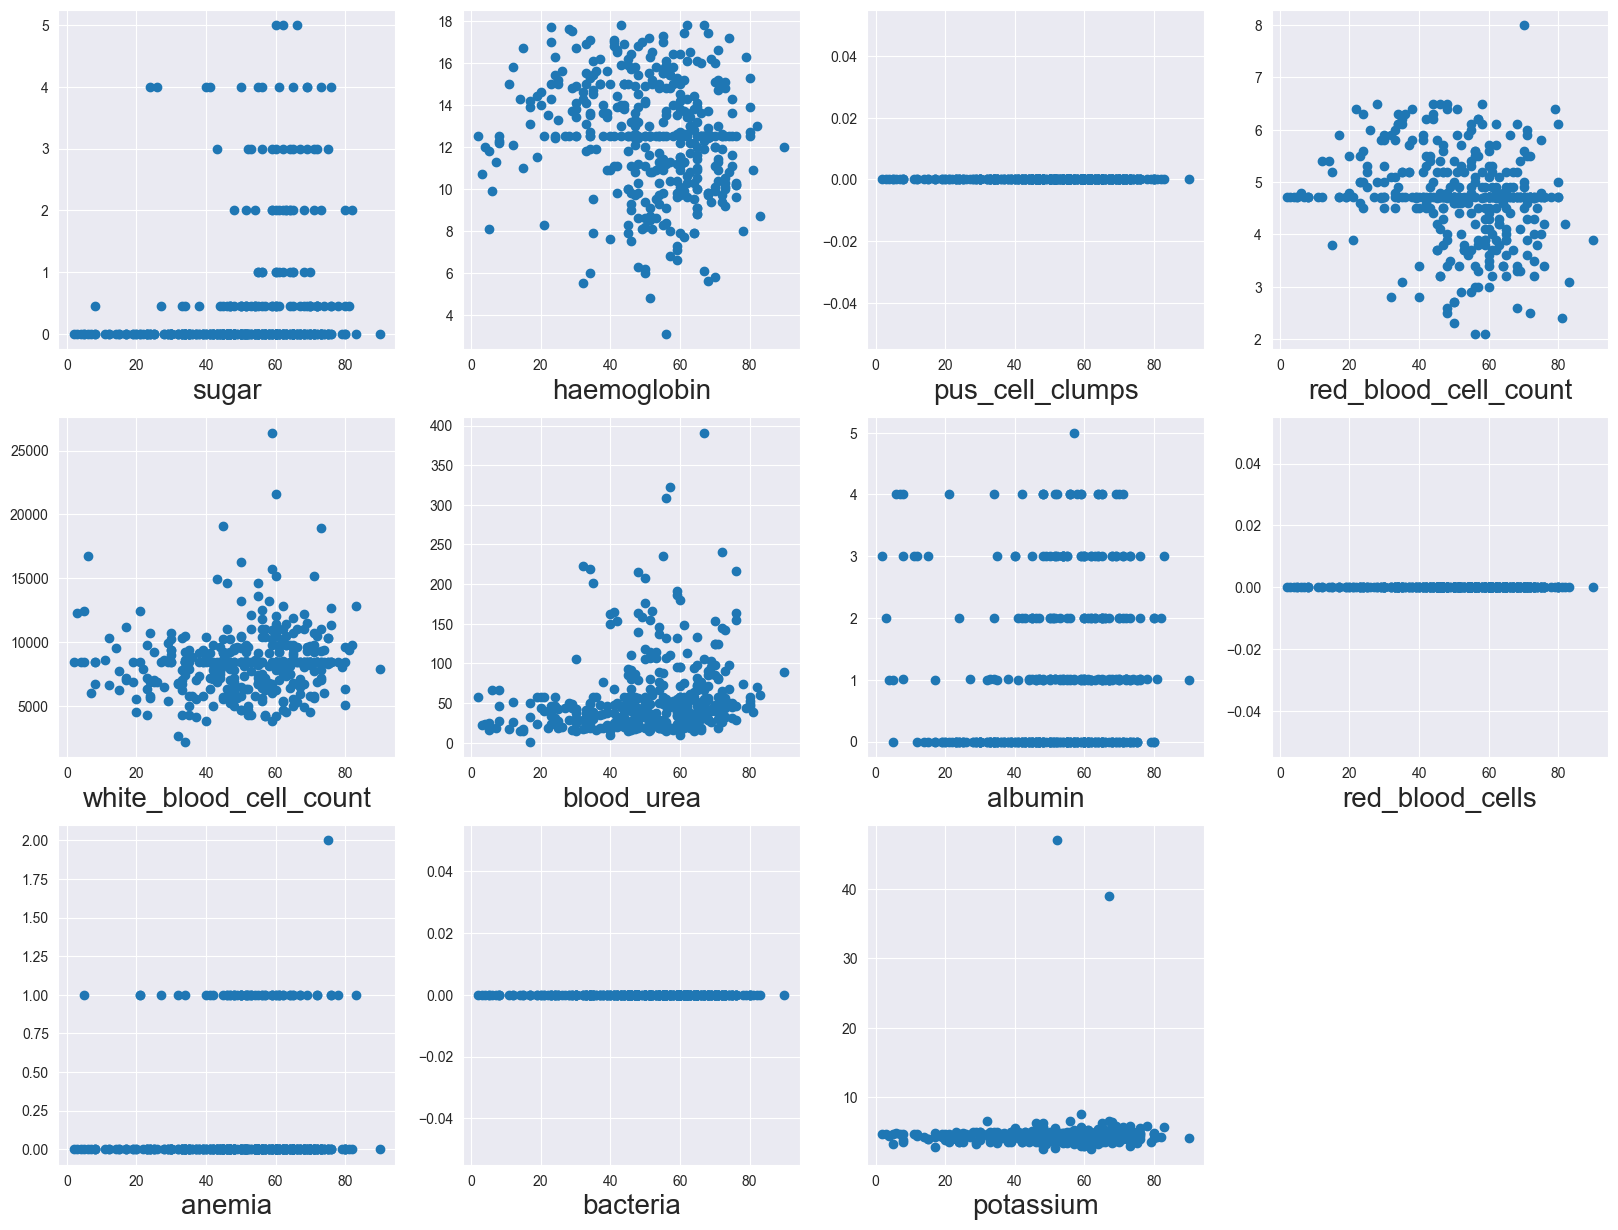

In [24]:
plt.figure(figsize=(20, 15), facecolor='white')
plotNumber = 1
for column in contcols:
    if plotNumber <= 11: # as there are 11 continuous columns in the data
        ax = plt.subplot(3, 4, plotNumber) # 3, 4 refers to the 3x4 matrix
        plt.scatter(data['age'], data[column]) # plotting scatter plot
        plt.xlabel(column, fontsize=20)
        # plt.ylabel('Salary', fontsize=20)
    plotNumber += 1
plt.show()

Finding correlation b/w independent columns

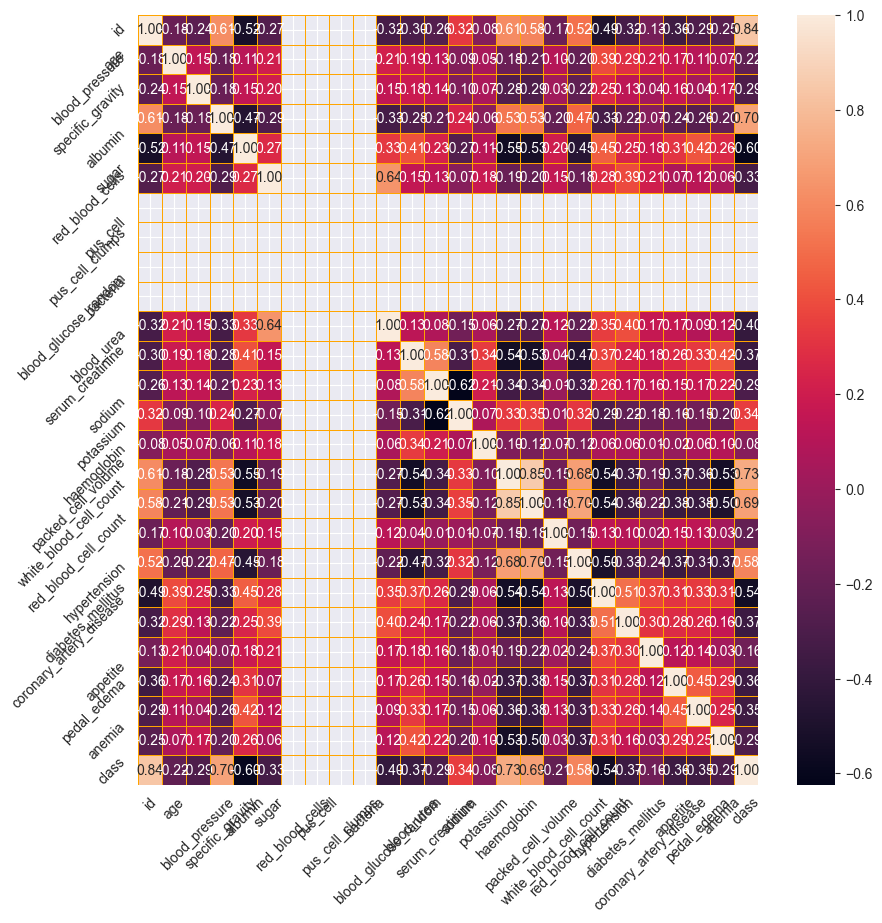

In [25]:
# Heat map - correlation of parameters
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, fmt = ".2f", ax = ax, linewidths=0.5, linecolor='orange')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()
#  the lighter the colour on the heatmap the correlation between those two variables will be high.

<Axes: ylabel='count'>

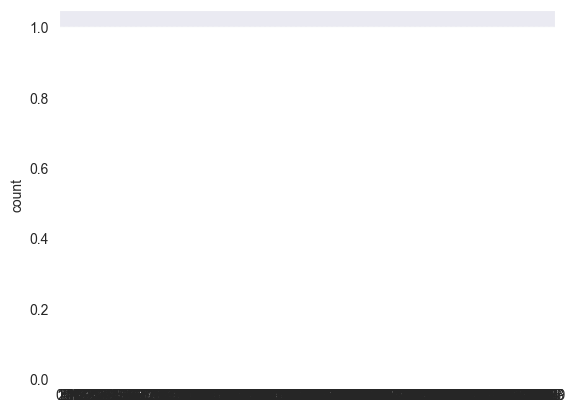

In [26]:
sns.countplot(data['class'])

In [27]:
# Select the columns you want to scale
X = data.drop('class', axis=1)

In [28]:
from sklearn.preprocessing import StandardScaler
X = data.drop('class', axis=1)  # exclude target
sc = StandardScaler()
x_bal = sc.fit_transform(X)
import pickle
pickle.dump(sc, open('scaler.pkl', 'wb'))

Creating Dependent and Independent

In [29]:
selcols = ['id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
           'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
           'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
           'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count',
           'red_blood_cell_count', 'hypertension', 'diabetes_mellitus',
           'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia']

x = pd.DataFrame(data, columns=selcols)
y = pd.DataFrame(data, columns=['class'])
print(x.shape)
print(y.shape)

# In the above code we are creating DataFrame of the independent variable x with our selected columns, and for dependent variable y we are only taking the class column.

(400, 25)
(400, 1)


Splitting data into train and test

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

**Training the model in Multiple Algos**

Now our data is cleaned and it’s time to build the model. We can train our data on different algorithms. For this project we are applying four classification algorithms. The best model is saved based on its performance.

Building and training an Artificial Neural Network (ANN) using the Keras library with TensorFlow as the backend.

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2025-08-04 15:25:23.366108: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [32]:
# Creating ANN skeleton view
classification = Sequential()
classification.add(Dense(30, activation='relu'))
classification.add(Dense(128, activation='relu'))
classification.add(Dense(64, activation='relu'))
classification.add(Dense(32, activation='relu'))
classification.add(Dense(1, activation='sigmoid'))


In [33]:
# Compiling the ANN model
classification.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
# Training the model
classification.fit(x_train, y_train, batch_size = 10, validation_split=0.2, epochs=100)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.1787 - loss: 52.2977 - val_accuracy: 0.6562 - val_loss: 23.0294
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2442 - loss: 10.0812 - val_accuracy: 0.0000e+00 - val_loss: 4.3683
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1442 - loss: 3.9101 - val_accuracy: 0.0000e+00 - val_loss: 21.4485
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1629 - loss: 14.8620 - val_accuracy: 0.6406 - val_loss: 2.1455
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3763 - loss: 8.0381 - val_accuracy: 0.0000e+00 - val_loss: -0.0892
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1688 - loss: -5.4693 - val_accuracy: 0.2812 - val_loss: -6.0241
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1657 - loss: -2.5555 - val_accuracy: 0.0000e+00 - val_loss: -4.1029
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1089 - loss: -11.01

In [35]:
classification.save('ckd_ann_model.keras')

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Predict probabilities with ANN
y_pred_ann = classification.predict(x_test)

# Convert probabilities to class labels
y_pred_ann = (y_pred_ann > 0.5).astype(int)

# Evaluate
print("ANN Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_ann))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ann))
print("Classification Report:\n", classification_report(y_test, y_pred_ann, zero_division=0))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
ANN Model Evaluation:
Accuracy: 0.2625
Confusion Matrix:
 [[20 33  0]
 [ 0  1  0]
 [ 0 26  0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.38      0.55        53
           1       0.02      1.00      0.03         1
           2       0.00      0.00      0.00        26

    accuracy                           0.26        80
   macro avg       0.34      0.46      0.19        80
weighted avg       0.66      0.26      0.36        80



Random Forest Model

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, criterion='entropy')

# RandomForestClassifier(...) -> You're creating a new Random Forest classifier object from scikit-learn. This is a type of ensemble machine learning model used for classification tasks.

# n_estimators=10 -> This means the forest will consist of 10 decision trees. More trees = better accuracy, usually, but slower training.

# criterion='entropy' -> This tells each decision tree to use information gain (based on entropy) to decide splits, instead of the default Gini impurity.

In [38]:
rfc.fit(x_train, y_train.values.ravel())

# .fit(...) -> This is the method that trains the model using your training data. Think of this as "learning patterns" from the data.

# x_train -> These are your input features

# y_train. -> These are your target labels

# so basically -> Hey rfc, look at these inputs (x_train) and learn to predict the correct outputs (y_train)

# scikit-learn expects y_train to be a 1D array, but we are passing it as a 2D column vector so we flatten the target column using ravel()

,n_estimators,10
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [39]:
import pickle
pickle.dump(rfc, open('ckd_rf_model.pkl', 'wb'))

In [40]:
y_pred_rf = rfc.predict(x_test)

print("Random Forest Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf, zero_division=0))


Random Forest Evaluation:
Accuracy: 0.9875
Confusion Matrix:
 [[53  0  0]
 [ 1  0  0]
 [ 0  0 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        53
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00        26

    accuracy                           0.99        80
   macro avg       0.66      0.67      0.66        80
weighted avg       0.98      0.99      0.98        80



In [41]:
y_predict = rfc.predict(x_test) # done to see testing accuracy

In [42]:
y_predict_train = rfc.predict(x_train) # done to see training accuracy

Decision Tree Model

In [43]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth = 4, splitter='best', criterion='entropy')

# max_depth=4 -> The tree will only grow 4 levels deep. This prevents it from getting too complex and overfitting

# splitter='best' -> The algorithm will choose the best split at each node (based on info gain)

# criterion='entropy' -> The tree will split nodes based on Information Gain (which uses entropy), instead of the default 'gini'

# so basically -> You're creating a shallow decision tree (only 4 levels deep) that splits based on maximum information gain (entropy). It will always try to make the most informative split at each step

# **************************

# What is entropy?

    # Entropy is a measure of impurity or randomness in your dataset — specifically, in the target variable (y).

        # If a dataset is pure (e.g., all the samples are from the same class), the entropy is 0.

        # If a dataset is completely mixed (e.g., 50% class A, 50% class B), the entropy is maximum.

    # Why does a decision tree care?
        # When the decision tree is deciding where to split the data, it checks:
            # What is the entropy before the split?
            # What will be the entropy after the split?
            # The best split is the one that reduces entropy the most — i.e. gives the highest information gain.

        # Basically: High entropy → lots of mix, bad
        #            Low entropy → more pure, good

In [44]:
dtc.fit(x_train, y_train.values.ravel())

,criterion,'entropy'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [45]:
y_predict_dtc = dtc.predict(x_test)
y_predict_dtc

array([0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2,
       0, 2, 0, 2, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0])

In [46]:
y_predict_train_dtc = dtc.predict(x_train)

Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(max_iter=4000)
lgr.fit(x_train, y_train.values.ravel())

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,4000
,multi_class,'deprecated'


Predicting our output with the model which we build

In [48]:
from sklearn.metrics import accuracy_score, classification_report
y_predict_lgr = lgr.predict(x_test)

Testing the model

In [49]:
# Logistic regression
# -------------------------------
# y_predict_lgr = lgr.predict([[1, 1, 121.000000, 36.0, 0, 0, 1, 0]])

# why the above line gives a warning:
    # When you trained your model using a pandas DataFrame (x_train), it had column names (feature names).
    # But now you're predicting with a plain list, which has no feature names.
    # So scikit-learn is warning you: “Yo, you're feeding me nameless data — this might not match what I was trained on!”
# -------------------------------
# rather do this:
sample = pd.DataFrame([[
    1,         # id
    45,        # age
    80,        # blood_pressure
    1.020,     # specific_gravity
    1,         # albumin
    0,         # sugar
    1,         # red_blood_cells (encoded)
    0,         # pus_cell (encoded)
    0,         # pus_cell_clumps
    0,         # bacteria
    110,       # blood_glucose_random
    40,        # blood_urea
    1.2,       # serum_creatinine
    140,       # sodium
    4.0,       # potassium
    14,        # haemoglobin
    40,        # packed_cell_volume
    7000,      # white_blood_cell_count
    5,         # red_blood_cell_count
    0,         # hypertension (encoded)
    1,         # diabetes_mellitus (encoded)
    0,         # coronary_artery_disease (encoded)
    1,         # appetite (encoded)
    0,         # pedal_edema (encoded)
    0          # anemia (encoded)
]], columns=selcols)
# -> this gives no warning
y_predict_lgr = lgr.predict(sample)
print(y_predict_lgr)

[0]


In [50]:
# Decision Tree Classifier
y_pred_dtc = pd.DataFrame([[
    1, 45, 80, 1.020, 1, 0, 1, 0, 0, 0, 110, 40, 1.2, 140, 4.0, 14, 40, 7000, 5,
    0, 1, 0, 1, 0, 0
]], columns=x_train.columns)

print(y_pred_dtc)


   id  age  blood_pressure  specific_gravity  albumin  sugar  red_blood_cells  \
0   1   45              80              1.02        1      0                1   

   pus_cell  pus_cell_clumps  bacteria  ...  haemoglobin  packed_cell_volume  \
0         0                0         0  ...           14                  40   

   white_blood_cell_count  red_blood_cell_count  hypertension  \
0                    7000                     5             0   

   diabetes_mellitus  coronary_artery_disease  appetite  pedal_edema  anemia  
0                  1                        0         1            0       0  

[1 rows x 25 columns]


In [51]:
# Random Forest Classifier
y_pred_rfc = pd.DataFrame([[
    1, 45, 80, 1.020, 1, 0, 1, 0, 0, 0, 110, 40, 1.2, 140, 4.0, 14, 40, 7000, 5,
    0, 1, 0, 1, 0, 0
]], columns=x_train.columns)

print(y_pred_rfc)


   id  age  blood_pressure  specific_gravity  albumin  sugar  red_blood_cells  \
0   1   45              80              1.02        1      0                1   

   pus_cell  pus_cell_clumps  bacteria  ...  haemoglobin  packed_cell_volume  \
0         0                0         0  ...           14                  40   

   white_blood_cell_count  red_blood_cell_count  hypertension  \
0                    7000                     5             0   

   diabetes_mellitus  coronary_artery_disease  appetite  pedal_edema  anemia  
0                  1                        0         1            0       0  

[1 rows x 25 columns]


In [52]:
classification.save('ckd.keras')

In [53]:
# Testing the model
y_pred = classification.predict(x_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [54]:
y_pred

array([[1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],

In [55]:
y_pred = (y_pred > 0.5)
y_pred

array([[ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [

In [56]:
def predict_exit(sample_value):
    # Convert the list to a numpy array
    sample_value = np.array(sample_value)
    # Reshape because sample_value contains only 1 record
    sample_value = sample_value.reshape(1, -1)
    # Feature scaling
    sample_value = sc.transform(sample_value)
    return classification.predict(sample_value)

In [57]:
test = classification.predict(np.array([[
    1, 45, 80, 1.020, 1, 0, 1, 0, 0, 0, 110, 40, 1.2, 140, 4.0, 14, 40, 7000, 5,
    0, 1, 0, 1, 0, 0
]]))
# classification expects the input in a format like a numpy array/tensor and not a plain list
if test[0][0] > 0.5:
    print("Prediction: High chance of CKD.")
else:
    print("Prediction: Low chance of CKD.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Prediction: Low chance of CKD.


#  Testing model with multiple evaluation metrics
Compare the model

In [100]:
from sklearn import model_selection

In [101]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.metrics import classification_report

def compare_models(x_train, x_test, y_train, y_test):
    # List to collect all CV results
    dfs = []

    # Define models to compare
    models = [
        ('LogReg', LogisticRegression(max_iter=13000)),
        ('RFC', RandomForestClassifier()),
        ('DTC', DecisionTreeClassifier())
    ]

    # Scoring metrics
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
    target_names = ['No CKD', 'CKD', 'Unknown']

    # Loop over models
    for name, model in models:
        print(f"\n{name}")

        # Cross-validation
        kfold = model_selection.KFold(n_splits=5, random_state=90210, shuffle=True)
        cv_results = model_selection.cross_validate(model, x_train, y_train, cv=kfold, scoring=scoring)

        # Train and predict
        clf = model.fit(x_train, y_train)
        y_pred = clf.predict(x_test)

        # Print classification report
        report = classification_report(y_test, y_pred, labels = [0, 1, 2], target_names=target_names, zero_division=0)
        print(report)

        # Store CV results
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)

    # Combine all CV results into one DataFrame
    final = pd.concat(dfs, ignore_index=True)
    return final


In [102]:
print(data.columns)

Index(['id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')


In [103]:
from sklearn.model_selection import train_test_split

X = data.drop('class', axis=1)
y = data['class']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Run comparison
results = compare_models(x_train, x_test, y_train, y_test)

# View full cross-validation results
print(results)

# Optional: Grouped average by model
print(results.groupby('model').mean())



LogReg


/Users/Aayush/Desktop/CKD_prediction_project/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/Aayush/Desktop/CKD_prediction_project/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/Aayush/Desktop/CKD_prediction_project/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 12861 iteration(s) (status=1):
STOP: TOTAL NO. OF F,G EVALUATIONS EXCEEDS LIMIT

You might also want to scal

              precision    recall  f1-score   support

      No CKD       1.00      0.98      0.99        52
         CKD       0.00      0.00      0.00         0

   micro avg       0.98      0.98      0.98        52
   macro avg       0.50      0.49      0.50        52
weighted avg       1.00      0.98      0.99        52


RFC


/Users/Aayush/Desktop/CKD_prediction_project/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/Aayush/Desktop/CKD_prediction_project/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


              precision    recall  f1-score   support

      No CKD       1.00      1.00      1.00        52
         CKD       0.00      0.00      0.00         0

   micro avg       1.00      1.00      1.00        52
   macro avg       0.50      0.50      0.50        52
weighted avg       1.00      1.00      1.00        52


DTC
              precision    recall  f1-score   support

      No CKD       1.00      1.00      1.00        52
         CKD       0.00      0.00      0.00         0

   micro avg       1.00      1.00      1.00        52
   macro avg       0.50      0.50      0.50        52
weighted avg       1.00      1.00      1.00        52

    fit_time  score_time  test_accuracy  test_precision_weighted  \
0   1.846490    0.011641       1.000000                 1.000000   
1   0.486130    0.014320       0.968750                 0.953804   
2   2.853152    0.011591       1.000000                 1.000000   
3   0.208930    0.008856       0.984375                 0.969141   
4

/Users/Aayush/Desktop/CKD_prediction_project/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2964: UserWarning: labels size, 2, does not match size of target_names, 3
  warnings.warn(
/Users/Aayush/Desktop/CKD_prediction_project/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/Aayush/Desktop/CKD_prediction_project/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/Aayush/Desktop/CKD_prediction_project/.venv/lib/python3.11/site-packages/

In [86]:
# Making the Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[10, 42,  0],
       [ 0,  0,  0],
       [10, 18,  0]])

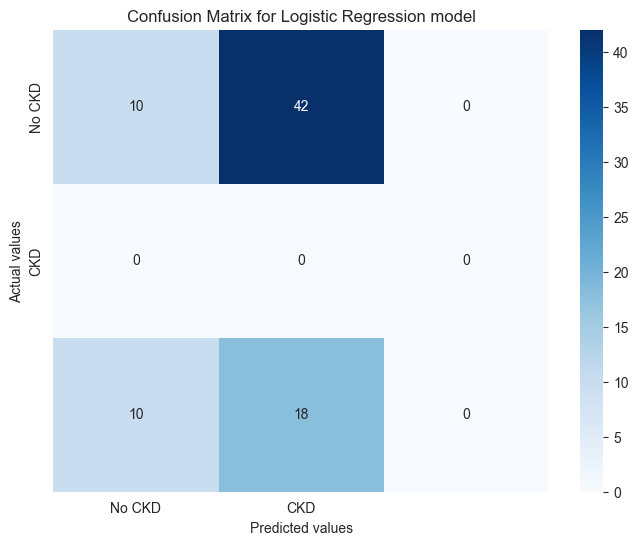

In [87]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['No CKD', 'CKD'], yticklabels=['No CKD', 'CKD'])
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Confusion Matrix for Logistic Regression model")
plt.show()

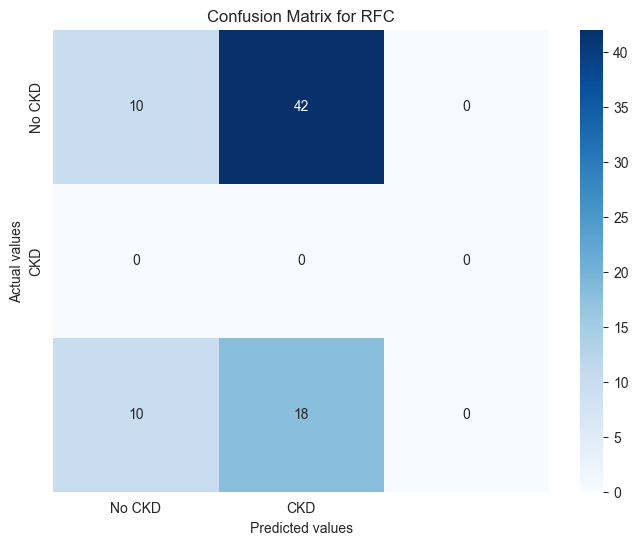

In [88]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['No CKD', 'CKD'], yticklabels=['No CKD', 'CKD'])
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Confusion Matrix for RFC")
plt.show()

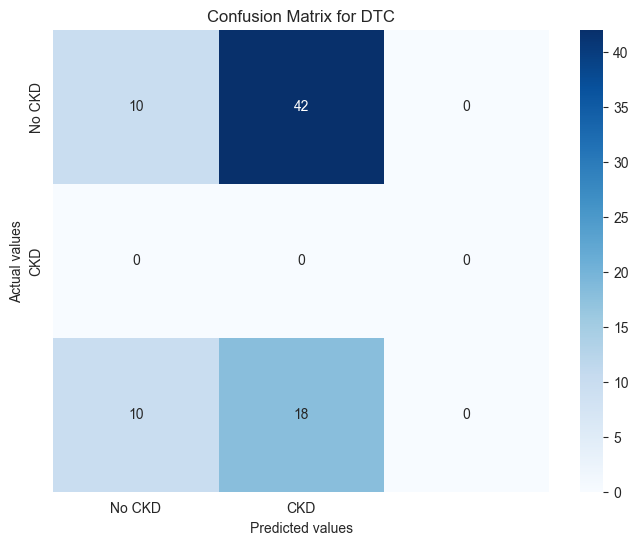

In [89]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['No CKD', 'CKD'], yticklabels=['No CKD', 'CKD'])
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Confusion Matrix for DTC")
plt.show()

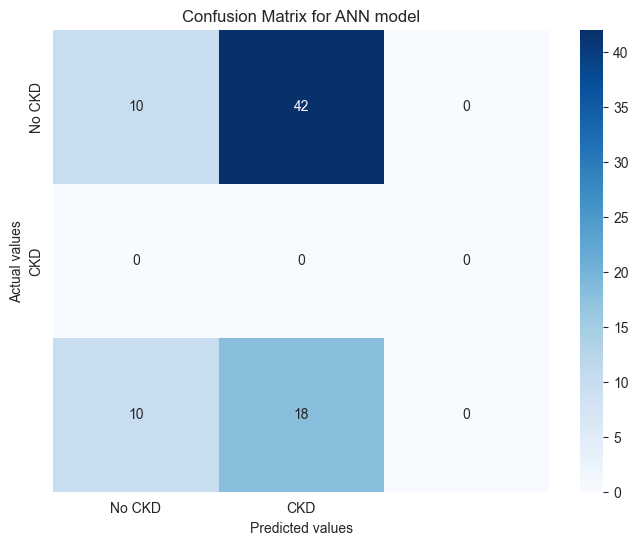

In [90]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['No CKD', 'CKD'], yticklabels=['No CKD', 'CKD'])
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Confusion Matrix for ANN model")
plt.show()

Evaluate the results

In [92]:
bootstraps = []
final = compare_models(x_train, x_test, y_train, y_test)
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n = 30, replace = True)
    bootstraps.append(bootstrap)
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df, id_vars=['model'], var_name = 'metrics', value_name = 'values')
time_metrics = ['fit_time', 'score_time']

results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)]
results_long_nofit = results_long_nofit.sort_values(by='values')

results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)]
results_long_fit = results_long_fit.sort_values(by='values')


LogReg


/Users/Aayush/Desktop/CKD_prediction_project/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/Aayush/Desktop/CKD_prediction_project/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/Aayush/Desktop/CKD_prediction_project/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 12861 iteration(s) (status=1):
STOP: TOTAL NO. OF F,G EVALUATIONS EXCEEDS LIMIT

You might also want to scal

              precision    recall  f1-score   support

      No CKD       1.00      0.98      0.99        52
         CKD       0.00      0.00      0.00         0
     Unknown       1.00      1.00      1.00        28

    accuracy                           0.99        80
   macro avg       0.67      0.66      0.66        80
weighted avg       1.00      0.99      0.99        80


RFC


/Users/Aayush/Desktop/CKD_prediction_project/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/Aayush/Desktop/CKD_prediction_project/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


              precision    recall  f1-score   support

      No CKD       1.00      1.00      1.00        52
         CKD       0.00      0.00      0.00         0
     Unknown       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       0.67      0.67      0.67        80
weighted avg       1.00      1.00      1.00        80


DTC
              precision    recall  f1-score   support

      No CKD       1.00      0.98      0.99        52
         CKD       0.00      0.00      0.00         0
     Unknown       1.00      1.00      1.00        28

    accuracy                           0.99        80
   macro avg       0.67      0.66      0.66        80
weighted avg       1.00      0.99      0.99        80



/Users/Aayush/Desktop/CKD_prediction_project/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/Aayush/Desktop/CKD_prediction_project/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/Aayush/Desktop/CKD_prediction_project/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

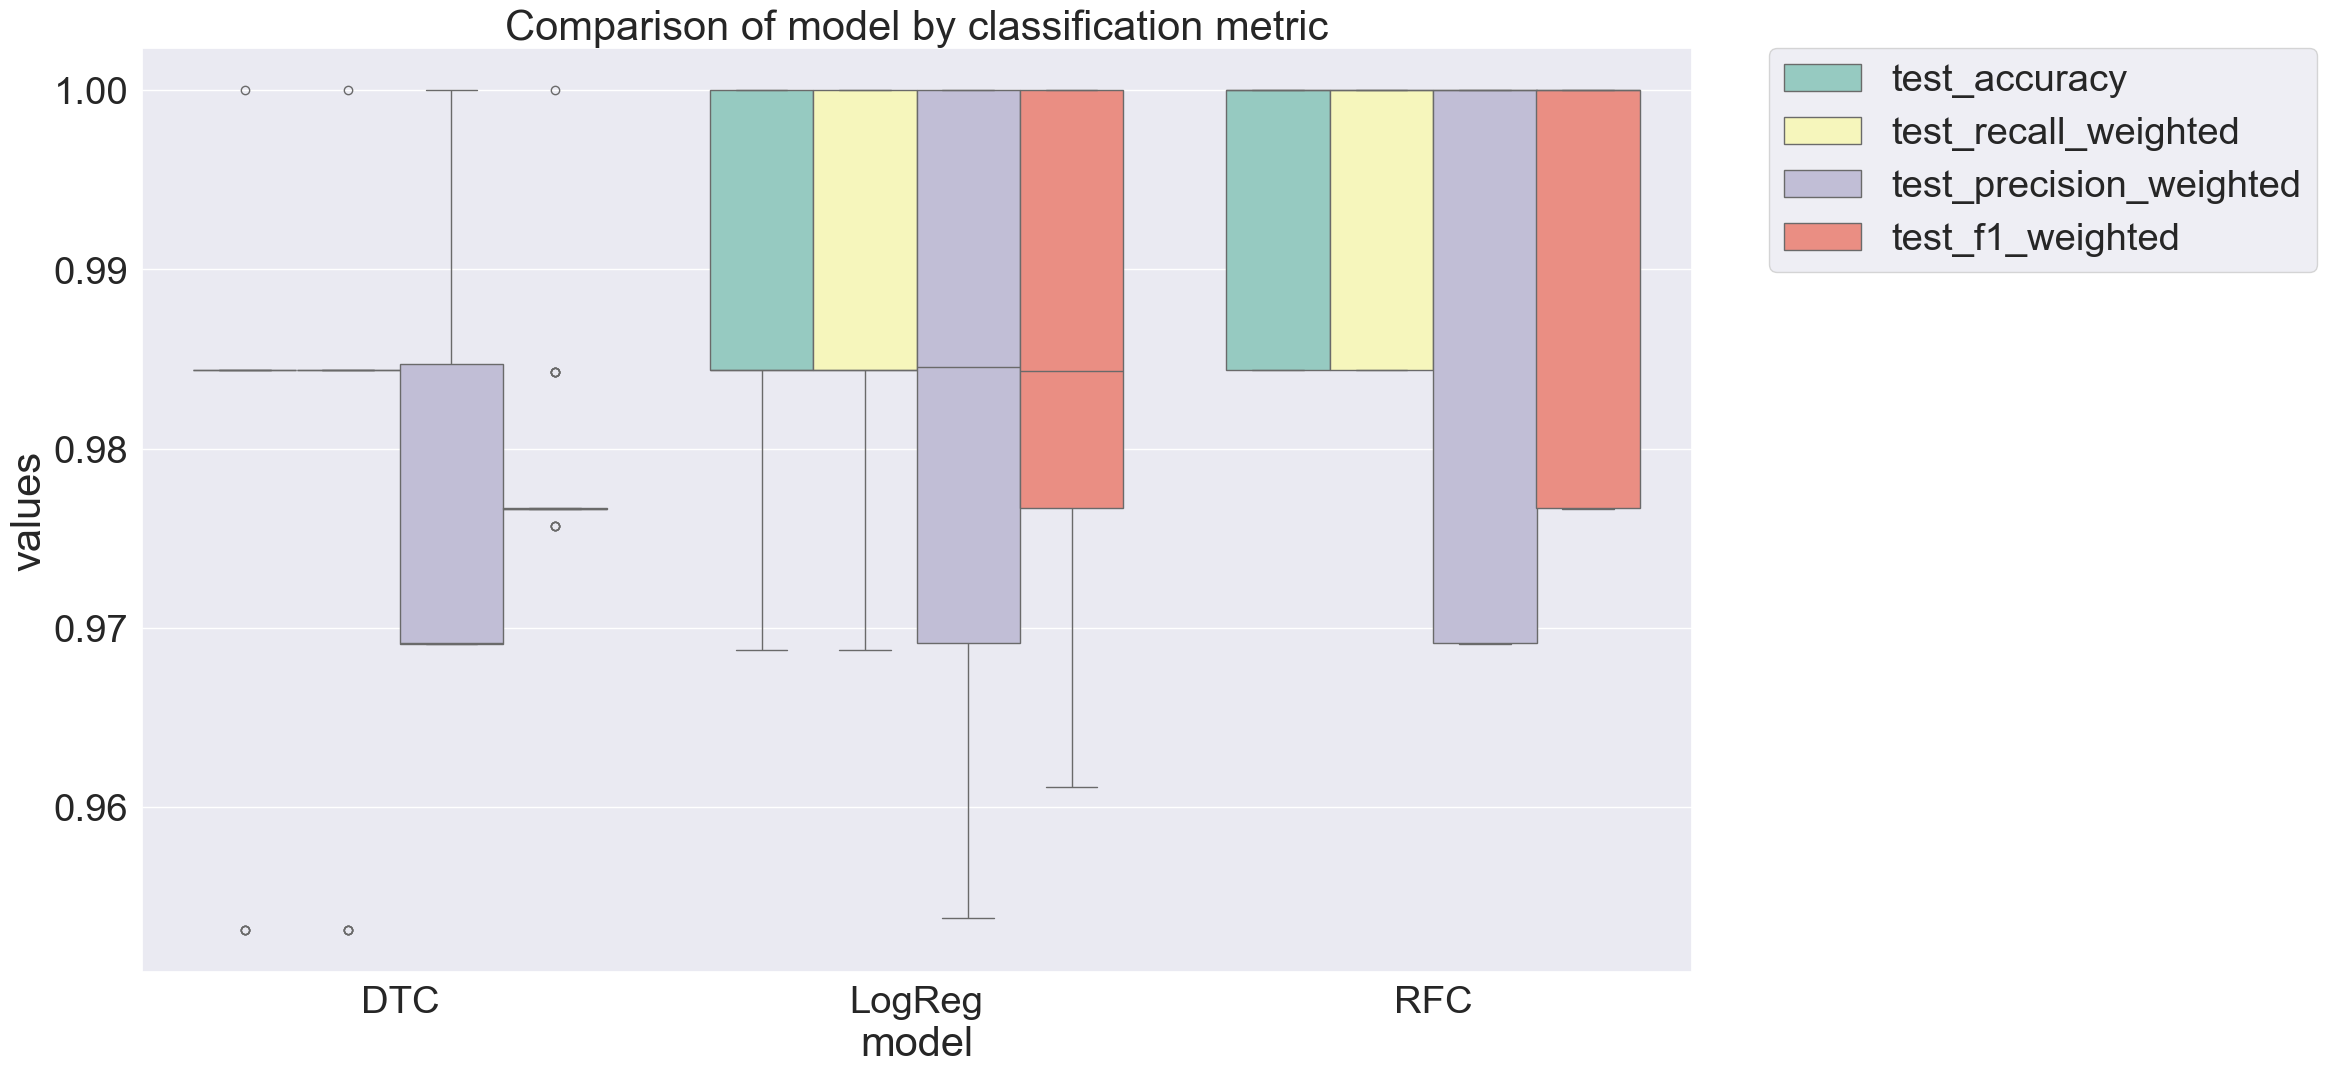

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x='model', y='values', hue='metrics', data=results_long_nofit, palette = 'Set3')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of model by classification metric')
plt.savefig('./ckd_comparison.png', dpi = 300)


Saving the best model

In [94]:
pickle.dump(lgr, open('CKD.pkl', 'wb'))